In [1]:
from sklearn.decomposition import PCA
import pickle
import pandas as pd
import numpy as np
from random import shuffle

In [2]:
with open("test_results_2311.pkl", "rb") as f:
    test_results = pickle.load(f)

In [6]:
test_results[0]['features'].shape

(200,)

In [3]:
results_df = pd.DataFrame.from_dict(test_results).transpose()

In [4]:
results_df

,act_id,actual,features,file,pred_id,prediction
0,2,handclapping,"[0.0, 0.49402744, 0.0, 0.0, -0.0, -0.0, 0.0, 0...",DataSets/KTH/test/handclapping/person01_handcl...,jogging,jogging
1,2,handclapping,"[0.0, 0.5552062, 0.0, 0.0, -0.0, -0.0, 0.0, 0....",DataSets/KTH/test/handclapping/person01_handcl...,jogging,jogging
2,2,handclapping,"[0.0, 0.61114496, 0.0, 0.0, -0.0, -0.0, 0.0, 0...",DataSets/KTH/test/handclapping/person01_handcl...,jogging,jogging
3,2,handclapping,"[0.0, 0.5749165, 0.0, 0.0, -0.0, -0.0, 0.0, 0....",DataSets/KTH/test/handclapping/person01_handcl...,jogging,jogging
4,2,handclapping,"[0.0, 1.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0...",DataSets/KTH/test/handclapping/person02_handcl...,jogging,jogging
5,2,handclapping,"[0.0, 0.6205007, 0.0, 0.0, -0.0, -0.0, 0.0, 0....",DataSets/KTH/test/handclapping/person02_handcl...,jogging,jogging
6,2,handclapping,"[0.0, 0.86600107, 0.0, 0.0, -0.0, 0.0, 0.0, 0....",DataSets/KTH/test/handclapping/person02_handcl...,jogging,jogging
7,2,handclapping,"[0.0, 0.8076751, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0...",DataSets/KTH/test/handclapping/person02_handcl...,jogging,jogging
8,1,handclapping,"[0.0, 0.17654291, 0.0, 0.0, -0.0, -0.0, 0.0, 0...",DataSets/KTH/test/handclapping/person03_handcl...,handclapping,handclapping
9,2,handclapping,"[0.0, 0.41541928, 0.0, 0.0, -0.0, -0.0, 0.0, 0...",DataSets/KTH/test/handclapping/person03_handcl...,jogging,jogging


In [23]:
results_copy = results_df[['actual', 'features']]

In [30]:
results_dict = results_copy.to_dict('records')

In [61]:
results_list = np.array([np.array([item['actual'], item['features']]) for item in results_dict])

In [66]:
labels, features = results_list[:,0], results_list[:,1]

In [70]:
features = np.array([np.array(f) for f in features])

In [40]:
main, test = results_list[:50], results_list[50:]

In [43]:
main = np.array([np.array(list(i)) for i in main])
test = np.array([np.array(list(i)) for i in test])

In [52]:
main_features = np.array([np.array(i) for i in main[:,1]])
test_features = np.array([np.array(i) for i in test[:,1]])

In [143]:
pca = PCA(n_components=100)
pca_features = pca.fit_transform(features)

In [74]:
random_indices = list(range(299))
shuffle(random_indices)
random_indices = random_indices[:50]

In [86]:
set(labels)

{'handclapping', 'jogging', 'running'}

In [95]:
label_dict = dict([(l, idx) for idx, l in enumerate(set(labels))])

In [96]:
label_dict

{'handclapping': 1, 'jogging': 2, 'running': 0}

In [121]:
def get_retrieval_accuracy(main_label, retrieval_labels):
    return (retrieval_labels.count(main_label) - 1) / len(retrieval_labels)

def cosine_similarity(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [155]:
def find_closest(test_feat, main_array, threshold = 0.95):
    close_list = list()
    for idx, feat in enumerate(main_array.tolist()):
        score = cosine_similarity(feat, test_feat)
        if score > threshold:
            close_list.append(np.array([idx, score]))
    return np.array(close_list)

def get_average(l):
    return sum(l)/len(l)

In [199]:
def get_pca_accuracy(n_comp):
    pca = PCA(n_components=n_comp)
    pca_features = pca.fit_transform(features)
    lstm_accuracy = list()
    pca_accuracy = list()

    for idx in random_indices:
        lstm_results = find_closest(results_list[:,1][idx], np.array([m for m in results_list[:,1]]))
        lstm_indices, lstm_scores = lstm_results[:,0], lstm_results[:,1]

        pca_results = find_closest(pca_features[idx], pca_features)
        pca_indices, pca_scores = pca_results[:,0], pca_results[:,1]

        lstm_accuracy.append(get_retrieval_accuracy(label_dict[results_list[:,0][idx]], [label_dict[results_list[:,0][i]] for i in np.asarray(lstm_indices, dtype=np.int16)]))
        pca_accuracy.append(get_retrieval_accuracy(label_dict[results_list[:,0][idx]], [label_dict[results_list[:,0][i]] for i in np.asarray(pca_indices, dtype=np.int16)]))
    
    return get_average(lstm_accuracy), get_average(pca_accuracy)

In [202]:
get_pca_accuracy(150)

(0.65526386824931, 0.610614094623488)

In [198]:
from matplotlib import pyplot as plt

In [204]:
x = list(range(1,200,10))
y = [get_pca_accuracy(i)[-1] for i in x]

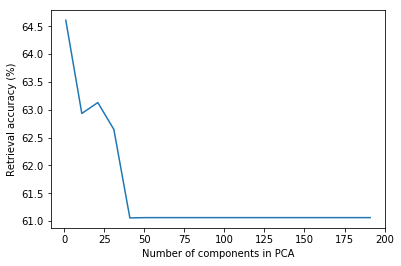

In [212]:
yj = [i*100 for i in y]
plt.plot(x,yj)
plt.xlabel("Number of components in PCA")
plt.ylabel("Retrieval accuracy (%)")
plt.savefig("pca_results.jpeg")